### Nama : Muhammad Bagus Hidayatullah
### NIM : 20/460185/TK/50774

Pada tugas Reinforcement Learning, saya menggunakan library OpenAI sebagai environment untuk implementasi Algoritma Q-Learning. Environment OpenAI yang saya gunakan adalah MountainCar version (1.0.0). Pada environment ini, obyektif kita adalah membawa mobil menuju puncak bukit yang memiliki bendera. State yang diobservasi pada environment ini adalah posisi mobil pada sumbu-x dan kecepatan dari mobil. Action ang bisa diberikan pada environment ini ada 3 yaitu akselerasi ke kiri, akselerasi ke kanan, dan diam tanpa akselerasi. 

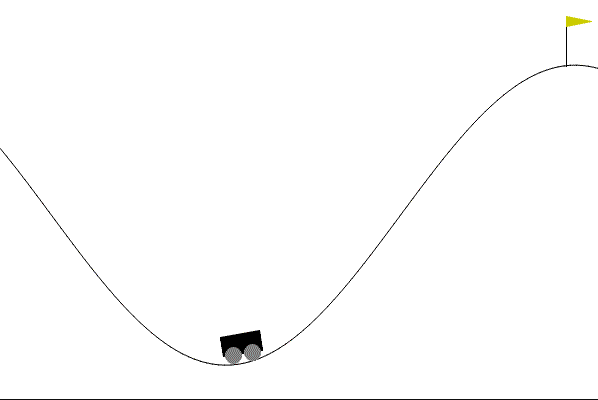

## Import Library

In [1]:
import gym
import numpy as np 

## Create Environment

In [2]:
env = gym.make('MountainCar-v0', render_mode = "human")

## Declare Variable

In [9]:
lr = 0.1 #learning rate
episode = 10
gamma = 0.95 #discounted factor

# Epsilon, for determining exploration or exploitation action taken
epsilon = 1
start_epsilon = 1
end_epsilon = episode//2
decaying_epsilon = epsilon / (end_epsilon - start_epsilon)

# Size of state and action space
state_space = env.observation_space.shape[0]
action_space = env.action_space.n

bins = [
        np.linspace(env.observation_space.low[0], env.observation_space.high[0], 20),
        np.linspace(env.observation_space.low[1], env.observation_space.high[1], 20)
]

# Create Q-table
qtable = np.random.uniform(2, 0, size=(20, 20, action_space))
qtable.shape

(20, 20, 3)

## Function to get the discrete state

In [10]:
def discrete_state(state, bins, obs):
    index = []
    for i in range(obs):
        index.append(np.digitize(state[i], bins[i])-1)
    return tuple(index)

## Training Loop dengan Q-Learning

In [ ]:
for run in range(episode):
    dis_state = discrete_state(env.reset()[0], bins, state_space)
    done = False
    
    while not done:
        
        env.render() # render the animation
        
        if np.random.random()>epsilon:
            action = np.argmax(qtable[dis_state])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)[:4] # step action to get new states, reward, and the 'done' status
        
        new_dis_state = discrete_state(new_state, bins, state_space)
        
        # Updating Q-table
        max_future_Q = np.max(qtable[new_dis_state[:1]])
        cur_Q = qtable[dis_state[0] + (action,)]
        new_Q = (1 - lr)*cur_Q + lr*(reward + gamma*max_future_Q)
        cur_Q = new_Q
        
        dis_state = new_dis_state
    
    if end_epsilon >= run >= start_epsilon:
        epsilon -= decaying_epsilon
        
    print("Finished Episode: ",(run+1))
        

env.close()